# Prepare Data

## Import Libraries

In [1]:
#import libs
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report, ConfusionMatrixDisplay
import re
import string
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

## Read csv files

In [2]:
#read csv files 
df_true = pd.read_csv('True.csv')
df_fake = pd.read_csv('Fake.csv')

In [3]:
# explore true data
print(df_true.shape)
print(df_true.info())
df_true.head()

(21417, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB
None


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
print(df_fake.shape)
print(df_fake.info())
df_fake.head()

(23481, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB
None


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


## Inserting Truth column

We will add a truth column in each data set and set it in true data 1 an 0 in fake dataset

In [5]:
df_true['truth'] = 1

In [6]:
df_true.head(1)

,title,text,subject,date,truth
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1


In [7]:
df_fake['truth'] = 0

In [8]:
df_fake.head(1)

,title,text,subject,date,truth
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0


## Merging data

In [9]:
# Creating new data compines the two datas
df  = pd.concat([df_true,df_fake])

In [10]:
# randomize the rows and reset the index
df = df.sample(frac=1).reset_index(drop=True)
df

,title,text,subject,date,truth
0,WATCH RELATIVES SPEAK OUT After Teen Caught In...,The attitudes of the family members defending ...,left-news,"Mar 16, 2016",0
1,Trump calls for trade deals with individual co...,(Reuters) - Republican presidential candidate ...,politicsNews,"March 11, 2016",1
2,Trump invites UK's May to visit 'as soon as po...,LONDON (Reuters) - U.S. President-elect Donald...,politicsNews,"November 10, 2016",1
3,CAN WE ADD DIRTY MONEY ‘LAUNDERING’ To The Oba...,A member of the House Intelligence Committee i...,politics,"Sep 19, 2016",0
4,Former FBI Agent: ‘Stay Tuned’ Because Muelle...,Donald Trump is terrified of Special Counsel R...,News,"August 6, 2017",0
...,...,...,...,...,...
44893,German 'Reich' extremist given life for killin...,"NUREMBERG, Germany (Reuters) - A right-wing ex...",worldnews,"October 23, 2017",1
44894,EU's Tusk appealed to Rajoy to avoid escalatio...,BRUSSELS (Reuters) - European Council Presiden...,worldnews,"October 2, 2017",1
44895,Highlights: The Trump presidency on March 14 a...,(Reuters) - Highlights of the day for U.S. Pre...,politicsNews,"March 13, 2017",1
44896,Top U.S. general in Afghanistan says new strat...,WASHINGTON (Reuters) - The head of U.S. and in...,politicsNews,"August 22, 2017",1


## Cleaning data

In [11]:
# drop unuseful data 
df = df.drop(columns=['title','subject','date'])

In [12]:
df.head()

,text,truth
0,The attitudes of the family members defending ...,0
1,(Reuters) - Republican presidential candidate ...,1
2,LONDON (Reuters) - U.S. President-elect Donald...,1
3,A member of the House Intelligence Committee i...,0
4,Donald Trump is terrified of Special Counsel R...,0


## Creat a function to process text

In [13]:
def wp(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [14]:
df["text"] = df["text"].apply(wp)

# Model buliding

## Split data

In [15]:
X=df['text']
y=df['truth']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(35918,)
(8980,)
(35918,)
(8980,)


## Convert text to vectors

In [17]:
vectorization = TfidfVectorizer()
XV_train = vectorization.fit_transform(X_train)
XV_test = vectorization.transform(X_test)

## Baseline model

In [18]:
# get our baselinemodel accuracy score
y.value_counts(normalize=True)[0]

0.5229854336496058

## Logistic regression

In [19]:
lr = LogisticRegression()
lr.fit(XV_train,y_train)

LogisticRegression()

In [20]:
pred_lr=lr.predict(XV_test)

In [21]:
# get accuracy score
score_lr = accuracy_score(y_test, pred_lr)
score_lr

0.9881959910913141

In [22]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4661
           1       0.99      0.99      0.99      4319

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



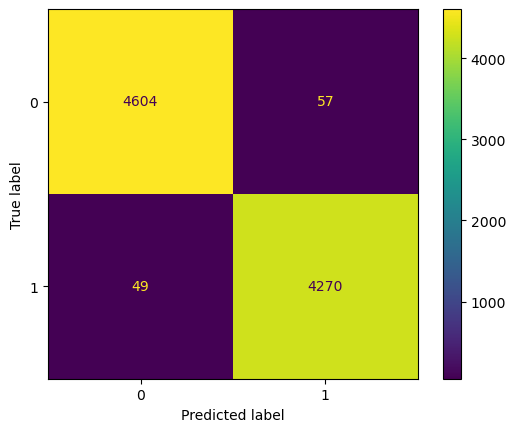

In [23]:
ConfusionMatrixDisplay.from_predictions(y_test, pred_lr);

## Decision Tree Classification

In [24]:
dt = DecisionTreeClassifier()
dt.fit(XV_train, y_train)

DecisionTreeClassifier()

In [25]:
pred_dt = dt.predict(XV_test)

In [26]:
score_dt = dt.score(XV_test, y_test)
score_dt

0.9965478841870824

In [27]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4661
           1       1.00      1.00      1.00      4319

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



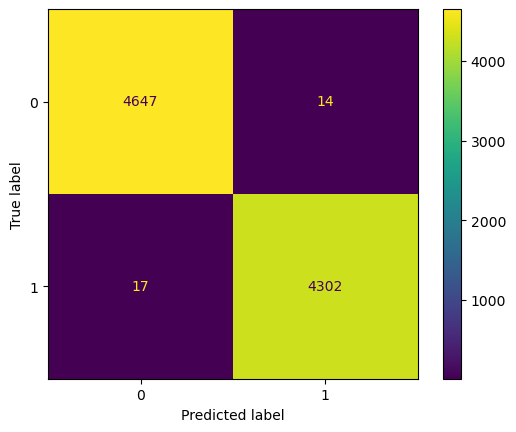

In [28]:
ConfusionMatrixDisplay.from_predictions(y_test, pred_dt);

## Random Forest Classifier

In [29]:
rfc = RandomForestClassifier(random_state=0)
rfc.fit(XV_train, y_train)

RandomForestClassifier(random_state=0)

In [30]:
pred_rfc = rfc.predict(XV_test)

In [31]:
score_rfc = rfc.score(XV_test, y_test)
score_rfc

0.9910913140311804

In [32]:
print(classification_report(y_test, pred_rfc))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4661
           1       0.99      0.99      0.99      4319

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



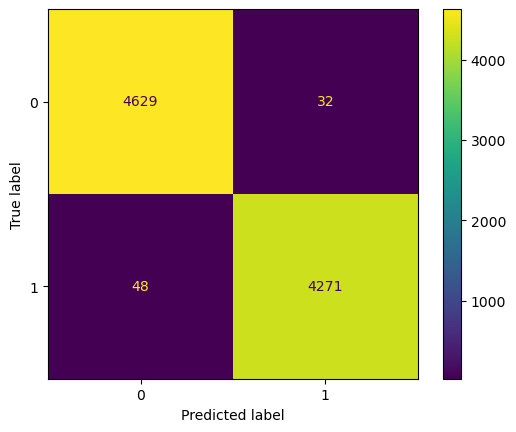

In [33]:
ConfusionMatrixDisplay.from_predictions(y_test, pred_rfc);

# Communicate the result 

In [34]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wp) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_lr = lr.predict(new_xv_test)
    pred_dt = dt.predict(new_xv_test)
    pred_rfc = rfc.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nRFC Prediction: {}".format(output_lable(pred_lr[0]),output_lable(pred_dt[0]),output_lable(pred_rfc[0])))

## Not fake news example

In [35]:
# enter a news text to find if its likly Fake or not
news = str(input())
manual_testing(news)

 BRUSSELS (Reuters) - NATO allies on Tuesday welcomed President Donald Trump s decision to commit more forces to Afghanistan, as part of a new U.S. strategy he said would require more troops and funding from America s partners. Having run for the White House last year on a pledge to withdraw swiftly from Afghanistan, Trump reversed course on Monday and promised a stepped-up military campaign against  Taliban insurgents, saying:  Our troops will fight to win .  U.S. officials said he had signed off on plans to send about 4,000 more U.S. troops to add to the roughly 8,400 now deployed in Afghanistan. But his speech did not define benchmarks for successfully ending the war that began with the U.S.-led invasion of Afghanistan in 2001, and which he acknowledged had required an   extraordinary sacrifice of blood and treasure .  We will ask our NATO allies and global partners to support our new strategy, with additional troops and funding increases in line with our own. We are confident they 



LR Prediction: Not A Fake News 
DT Prediction: Not A Fake News 
RFC Prediction: Not A Fake News


## Fake news example

In [36]:
news = str(input())
manual_testing(news)

 Vic Bishop Waking TimesOur reality is carefully constructed by powerful corporate, political and special interest sources in order to covertly sway public opinion. Blatant lies are often televised regarding terrorism, food, war, health, etc. They are fashioned to sway public opinion and condition viewers to accept what have become destructive societal norms.The practice of manipulating and controlling public opinion with distorted media messages has become so common that there is a whole industry formed around this. The entire role of this brainwashing industry is to figure out how to spin information to journalists, similar to the lobbying of government. It is never really clear just how much truth the journalists receive because the news industry has become complacent. The messages that it presents are shaped by corporate powers who often spend millions on advertising with the six conglomerates that own 90% of the media:General Electric (GE), News-Corp, Disney, Viacom, Time Warner, 



LR Prediction: Fake News 
DT Prediction: Fake News 
RFC Prediction: Fake News
